# Soccer Database
Pandas refresh project
## Team exploration

## Import stuff

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

### General settings

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import data

In [3]:
con = sqlite3.connect('data/database.sqlite')

### Load tables into dataframes

In [4]:
country = pd.read_sql_query('SELECT * FROM Country', con)
league = pd.read_sql_query('SELECT * FROM League', con)
match = pd.read_sql_query('SELECT * FROM Match', con)
player = pd.read_sql_query('SELECT * FROM Player', con)
player_attr = pd.read_sql_query('SELECT * FROM Player_Attributes', con)
team = pd.read_sql_query('SELECT * FROM Team', con)
team_attr = pd.read_sql_query('SELECT * FROM Team_Attributes', con)

### Let's look at team/team_attr

In [5]:
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [6]:
team_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


### Join both DF

In [7]:
team_full = pd.merge(team, team_attr, left_on='team_api_id', right_on='team_api_id')

In [8]:
team_full.head(50)

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485,673,2010-02-22 00:00:00,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,486,673,2011-02-22 00:00:00,66,Balanced,NaN,Little,52,Mixed,Organised,65,Normal,66,Normal,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,487,673,2012-02-22 00:00:00,53,Balanced,NaN,Little,55,Mixed,Organised,55,Normal,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,488,673,2013-09-20 00:00:00,58,Balanced,NaN,Little,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,489,673,2014-09-19 00:00:00,58,Balanced,52.0,Normal,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
5,1,9987,673.0,KRC Genk,GEN,490,673,2015-09-10 00:00:00,58,Balanced,52.0,Normal,38,Mixed,Organised,30,Safe,69,Lots,56,Normal,Organised,36,Medium,57,Press,70,Wide,Cover
6,2,9993,675.0,Beerschot AC,BAC,149,675,2010-02-22 00:00:00,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover
7,2,9993,675.0,Beerschot AC,BAC,150,675,2011-02-22 00:00:00,47,Balanced,NaN,Little,37,Mixed,Organised,54,Normal,64,Normal,67,Lots,Organised,33,Deep,34,Press,48,Normal,Offside Trap
8,2,9993,675.0,Beerschot AC,BAC,151,675,2012-02-22 00:00:00,55,Balanced,NaN,Little,55,Mixed,Organised,47,Normal,46,Normal,49,Normal,Organised,45,Medium,46,Press,50,Normal,Cover
9,2,9993,675.0,Beerschot AC,BAC,152,675,2013-09-20 00:00:00,47,Balanced,NaN,Little,39,Mixed,Organised,38,Normal,64,Normal,49,Normal,Organised,45,Medium,46,Press,67,Wide,Cover


#### Let's make a function that shows the evolution of team characteristics over the years
Input data is the team name. Output is a linechart that shows the numbers 

In [9]:
def teamchar(teamname):
    mask = team_full['team_long_name'] == teamname
    teamdata = team_full.loc[mask]
    x = teamdata.loc[:,'date']
    fig = plt.figure(figsize=(20,10))
    
    ax1 = fig.add_subplot(111)
    
    ax1.set(title=teamname)
    ax1.xaxis.set(ticklabels=teamdata.loc[:,'date'].astype(str).str[0:4])
        
    ax1.plot(x, teamdata.buildUpPlaySpeed, label='buildUpPlaySpeed')
    ax1.plot(x, teamdata.buildUpPlayPassing, label='buildUpPlayPassing')
    ax1.plot(x, teamdata.chanceCreationPassing, label='chanceCreationPassing')
    ax1.plot(x, teamdata.chanceCreationCrossing, label='chanceCreationCrossing')
    ax1.plot(x, teamdata.chanceCreationShooting, label='chanceCreationShooting')
    ax1.plot(x, teamdata.defencePressure, label='defencePressure')
    ax1.plot(x, teamdata.defenceAggression, label='defenceAggression')
    ax1.plot(x, teamdata.defenceTeamWidth, label='defenceTeamWidth')    
    
    ax1.legend()
    
    plt.show()

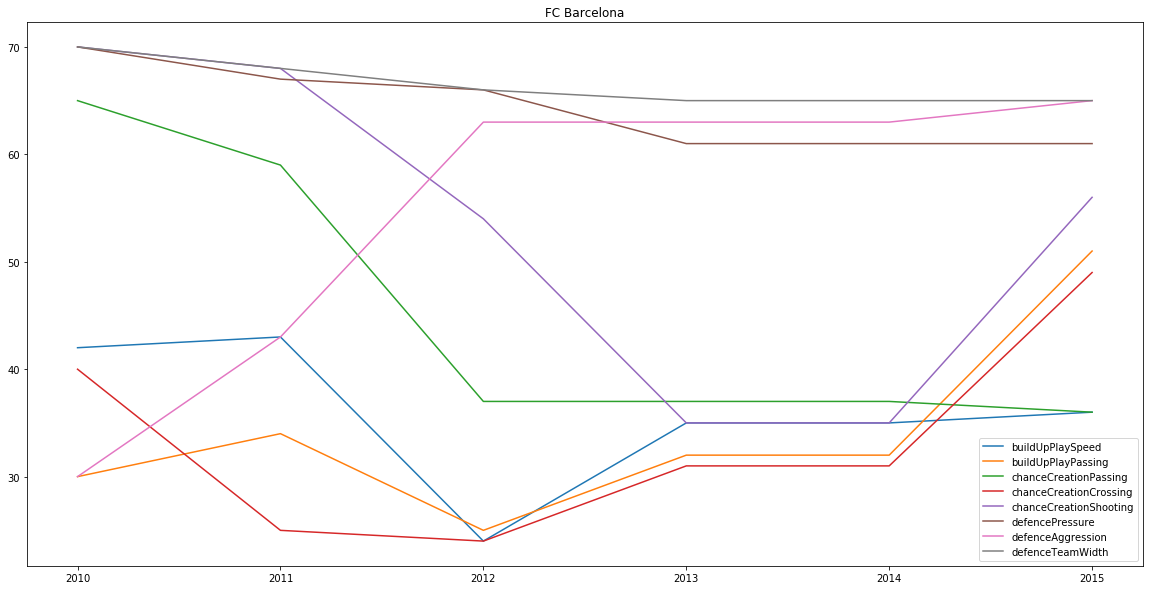

In [10]:
teamchar('FC Barcelona')

#### Let's make a ranking of teams who scored the most in one year

In [14]:
match['year'] = match.loc[:,'date'].astype(str).str[0:4]
team_match = pd.merge(match, team, left_on='home_team_api_id', right_on='team_api_id')

In [34]:
def topscore(year):
    mask = team_match.loc[:,'year'] == str(year)
    topscore_year = team_match.loc[mask]
    topscore_home = topscore_year.groupby('team_long_name').home_team_goal.sum().sort_values(ascending=False)
    topscore_away = topscore_year.groupby('team_long_name').away_team_goal.sum().sort_values(ascending=False)
    topscore_all = topscore_away + topscore_home
    display(topscore_all.sort_values(ascending=False))

In [37]:
topscore(2014)

team_long_name
FC Barcelona                    78
Real Madrid CF                  74
TSG 1899 Hoffenheim             66
Celtic                          64
FC Bayern Munich                64
Eintracht Frankfurt             63
Liverpool                       62
Partick Thistle F.C.            61
Napoli                          61
Dundee United                   60
Everton                         60
VfL Wolfsburg                   60
Manchester United               60
Southampton                     59
BSC Young Boys                  59
Udinese                         59
Grasshopper Club Zürich         59
Motherwell                      59
Ajax                            59
Rayo Vallecano                  59
FC Thun                         58
FC Basel                        58
Hellas Verona                   58
SC Cambuur                      57
PSV                             57
Stade de Reims                  57
Girondins de Bordeaux           57
West Bromwich Albion            57
Sevil